### Mobile Price Classification

### Team Mates: Nahid Kotnur, Jennifer Garcia, Jenish Dobariya

**Objective:**  

**Dataset:** 
[Mobile Price Classificaiton](https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification/data)

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Importing dataset
df_train = pd.read_csv("train.csv")

In [4]:
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
# Checking if the data is loaded correctly
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
# Getting statistical description
df_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [7]:
# Checking for null values
df_train.isnull().sum().sum()

0

In [8]:
df_train.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

This dataset has no Null values and all features seems to appear as they should. 

### Exploratory Data Analysis

Our taget variable is the prince_range. Checking what is the relative frequency of the classes

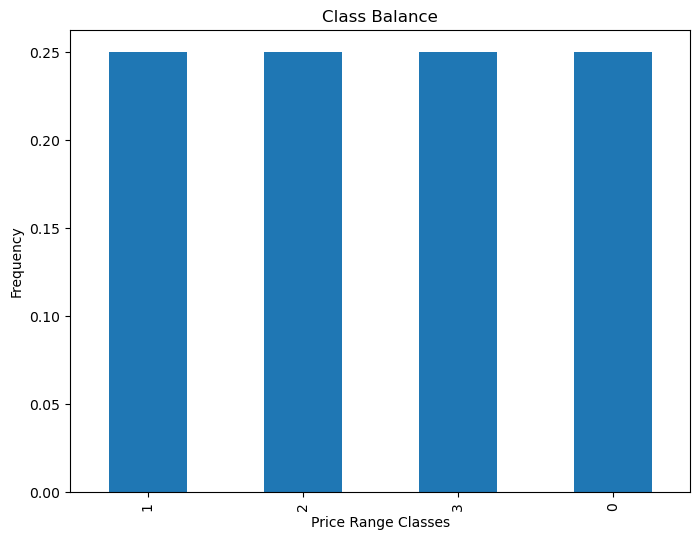

In [9]:
plt.figure(figsize=(8,6))
df_train['price_range'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel("Price Range Classes")
plt.ylabel("Frequency")
plt.title("Class Balance")
plt.show()

Ram and Battery power plays a significant role in deciding the price range.

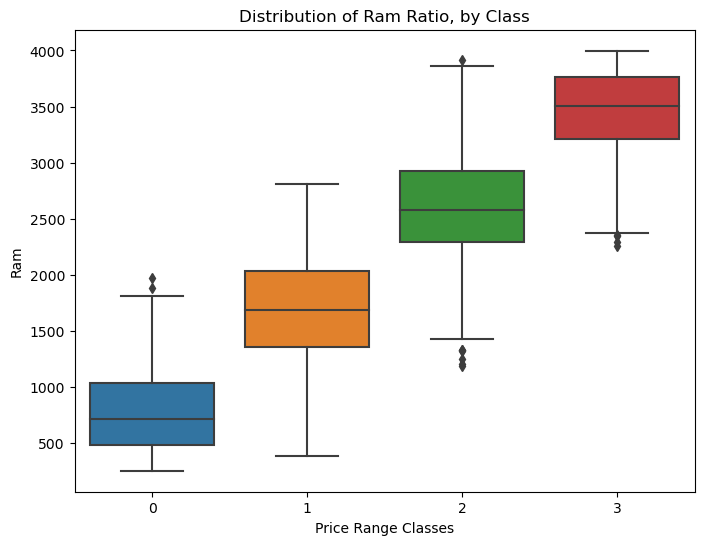

In [10]:
plt.figure(figsize=(8,6))
sns.boxplot(x="price_range", y='ram', data=df_train)
plt.xlabel("Price Range Classes")
plt.ylabel("Ram")
plt.title("Distribution of Ram Ratio, by Class")
plt.show()

With this plot we can see that the higher the ram in the phone, the average cost price for the phone is higher. There are a few outliers in class 0,2 and 3. Overall, with the box plot we can see that there is a good range of phones that provide good RAM at lower price as well.

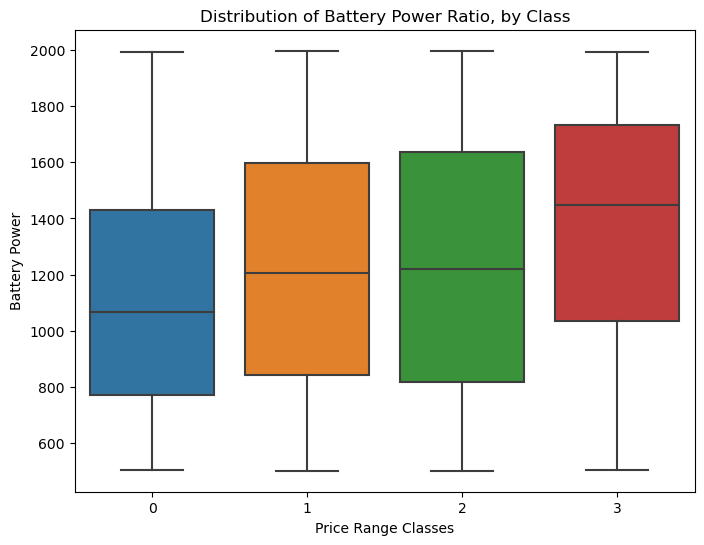

In [11]:
# Plotting Battery power with price range
plt.figure(figsize=(8,6))
sns.boxplot(x='price_range', y='battery_power', data=df_train)
plt.xlabel("Price Range Classes")
plt.ylabel("Battery Power")
plt.title("Distribution of Battery Power Ratio, by Class")
plt.show()

With this plot we can see that you can find phones with good battery power in every price range. However, as the price range increases the minimum battery power provided also increases.

**How does internet speed affect the price range of the phones?**

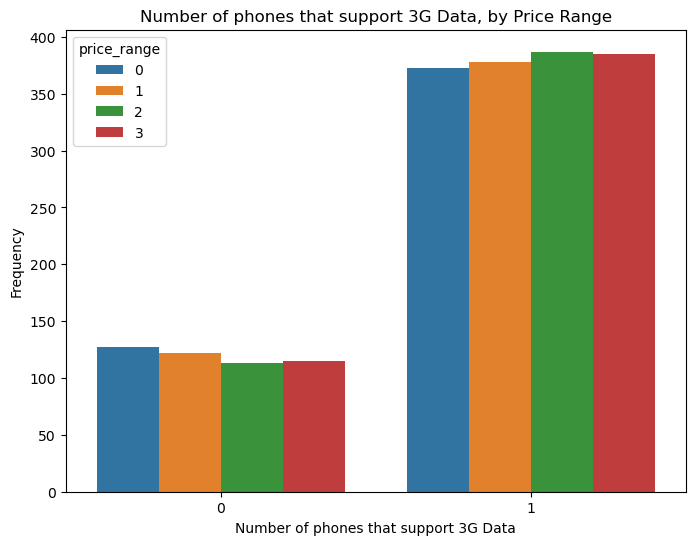

In [12]:
# Plotting 3G in price range
plt.figure(figsize=(8,6))
sns.countplot(data=df_train, x='three_g', hue='price_range')
plt.xlabel("Number of phones that support 3G Data")
plt.ylabel("Frequency")
plt.title("Number of phones that support 3G Data, by Price Range")
plt.show()

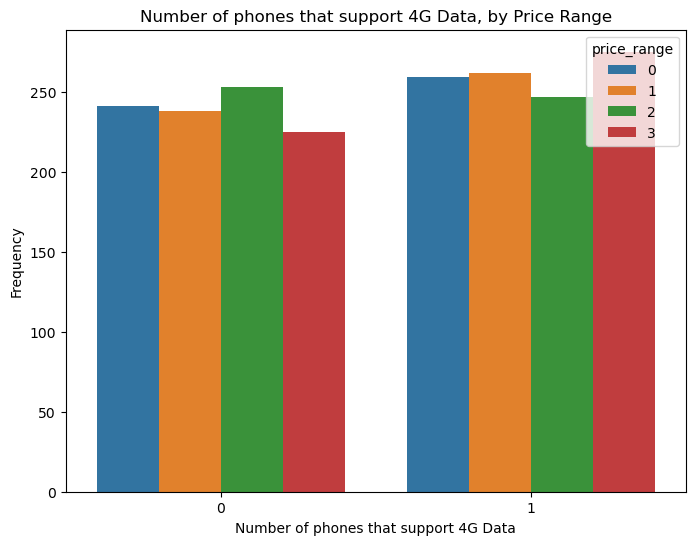

In [13]:
# Plotting 4G data with price range
plt.figure(figsize=(8,6))
sns.countplot(data=df_train, x='four_g', hue='price_range')
plt.xlabel("Number of phones that support 4G Data")
plt.ylabel("Frequency")
plt.title("Number of phones that support 4G Data, by Price Range")
plt.show()

The number of phones that support 4G data has a higher price range than phones that do not support 4G data. 

**Checking for Multicollinearity**

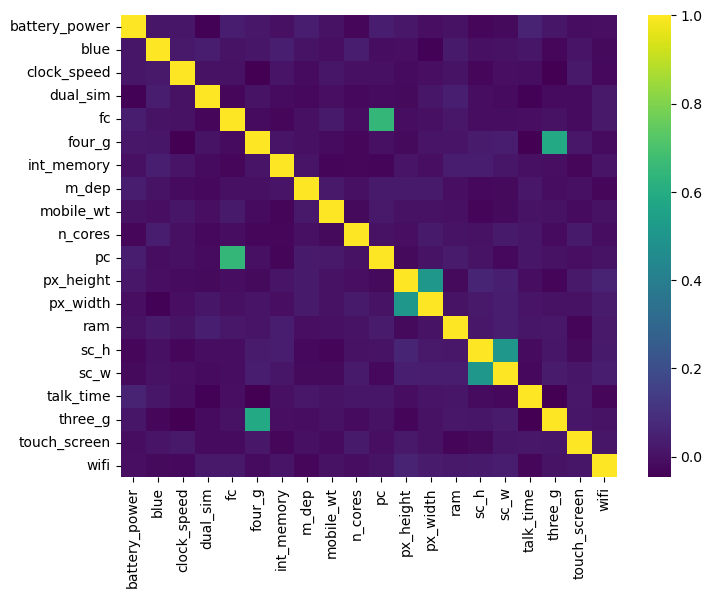

In [14]:
# Feature correlation matrix
mat_corr = df_train.drop(columns='price_range').corr()

# Visualizing any correlation between features
plt.figure(figsize=(8,6))
sns.heatmap(mat_corr, cmap='viridis')
plt.show()

The correlation between four_g and three_g seems high which makes sense since if the phone offer 4G then it is likely to also offer 3G.

**Splitting the data**

In [15]:
X = df_train.drop(columns=['price_range'])
y = df_train['price_range']

In [16]:
display(X.shape)
display(y.shape)

(2000, 20)

(2000,)

In [17]:
# Standardising data before using any algorithm
standa = MinMaxScaler()

In [18]:
features = X.columns
X = standa.fit_transform(X)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [20]:
display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

(1400, 20)

(600, 20)

(1400,)

(600,)

#### Using different Machine Learning Models

**Random Forest Classifier**

In [21]:
# Defining model
rf_classifier = RandomForestClassifier()

# Defining the hyper parameters
param_grid = {
    'max_depth':[None, 10,20,30],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}

# Creating Grid Search 
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='accuracy')

# Fitting Data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [22]:
# Getting the best model
best_rf_model = grid_search.best_estimator_

y_pred = best_rf_model.predict(X_test)

testing_acc_rfm = accuracy_score(y_test, y_pred)

print(f"Accuracy on Test set: {testing_acc_rfm:.2f}")

Accuracy on Test set: 0.88


**Support Vector Classifier**

In [23]:
# Defining model
svc = SVC()

# Defining the hyper parameters
param_grid = {
    'kernel':['linear','rbf','poly'],
    'C':[0.01,0.1,1,10,100],
    'gamma':[0.01,0.1,1,10,100]
}

# Creating Grid Search 
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=3, scoring='accuracy')

# Fitting Data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [24]:
best_svc_model = grid_search.best_estimator_
print(best_svc_model)

y_pred = best_svc_model.predict(X_test)

testing_acc_svc = accuracy_score(y_test, y_pred)

print(f"Accuracy on Test set: {testing_acc_svc:.2f}")

SVC(C=100, gamma=0.01, kernel='linear')
Accuracy on Test set: 0.96


**K-Nearest Neighbors (KNN)**

In [25]:
# Defining model
knn = KNeighborsClassifier()

# Defining the hyper parameters
param_grid = {
    'n_neighbors':[3,5,7,10],
    'p':[1,2],
    'weights':['uniform','distance']
}

# Creating Grid Search 
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=3, scoring='accuracy')

# Fitting Data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 10], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [26]:
# Getting the best model
best_knn_model = grid_search.best_estimator_

print(best_knn_model)

y_pred = best_knn_model.predict(X_test)

testing_acc_knn = accuracy_score(y_test, y_pred)

print(f"Accuracy on Test set: {testing_acc_knn:.2f}")

KNeighborsClassifier(n_neighbors=10, p=1, weights='distance')
Accuracy on Test set: 0.50


**Adaboost Classifier**

In [27]:
# Setting base estimator
base_estimator = DecisionTreeClassifier()

# Define the model
adaboost = AdaBoostClassifier(base_estimator=base_estimator)

# Defining parameters
param_grid={
    'n_estimators':[50,100,200],
    'learning_rate':[0.01,0.1,1]
}

# Creating a search
grid_search = GridSearchCV(estimator=adaboost, param_grid=param_grid, cv=5, scoring='accuracy')

# fitting the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [28]:
# Getting the best parameter
best_ada_model = grid_search.best_estimator_

print(f"Best adaboost model: {best_ada_model}")

y_pred = best_ada_model.predict(X_test)

testing_acc_ada = accuracy_score(y_test,y_pred)

# Printing accuracy
print(f"Accuracy score on Test Set: {testing_acc_ada:.3f}")

Best adaboost model: AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=0.1)
Accuracy score on Test Set: 0.827


#### Conclusion and best model

In [29]:
# Creating a dataframe of models and accuracy
models = pd.DataFrame({
    "Model":["Random Forest Classifier",
             "K-Nearest Neighbor",
              "Adaboost Classifier",
              "Support Vector Classifier"],
    "Score":[testing_acc_rfm, testing_acc_knn, testing_acc_ada, testing_acc_svc]
})

models.sort_values(by="Score", ascending=False)

,Model,Score
3,Support Vector Classifier,0.960000
0,Random Forest Classifier,0.876667
2,Adaboost Classifier,0.826667
1,K-Nearest Neighbor,0.500000


**Plotting a barchar to show the best model accuracy**

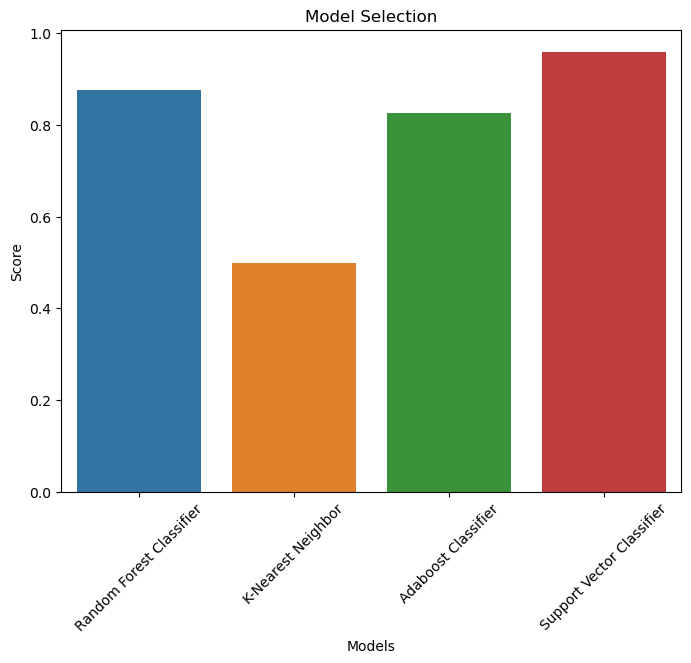

In [30]:
plt.figure(figsize=(8,6))
sns.barplot(x="Model", y="Score", data=models)
plt.xlabel("Models")
plt.xticks(rotation=45)
plt.ylabel("Score")
plt.title("Model Selection")
plt.show()

1. Support Vector Classifier: The support vector classifier achieved the highest score of 0.96 showcasing high level of accuracy. Based on the accuracy score the SVC model outperform the other models in comparision. 
2. Random Forest Classifier: The random forest classifier achieved a score of 0.86, which is lower than SVC but still a good model. With the versatility and robustness, the results align with the good performance across various task.
3. Adaboost Classifier: The model accuracy is 0.823. While the accuracy is not as high as SVC or Random Forest, it still demonstrates satisfactory perfomance classifying price range. 
4. K-Nearest Neighbor: This was the lowest scoring model with an accuracy score of 0.5. This suggests that, for classifying price range, this may not be the best model even after tuning hyperparameters.

In summary, Support Vector Classifier appears to be the most effective model when trying to classify the price range for this model. Using this model we can understand why Humane's AI pin is priced at such an high range.